**Color Correction Matrix (CCM)**

Implementation depends on opencv and numpy.

This implementation is as follows:

1. Convert the image from BGR space to LAB space.
2. Select the area from the target colorchecker and compute the average pixel values. (targetVal)
3. Create an array containing the reference values of the target colorchecker space. (refVal)
4. Perform color fitting from colorVal to refVal:
-- Perform a first order color fit from targetVal to refVal. The resulting color fit matrix is obtained using multiple linear regression

source: https://stackoverflow.com/questions/49221892/color-correction-matrix-in-lab-color-space-opencv

Python colormaps ref:
http://pydoc.net/pwkit/0.8.15/pwkit.colormaps/

In [1]:
import os
import numpy as np
import cv2 
from colour import read_image
from colour_checker_detection import TESTS_RESOURCES_DIRECTORY
import matplotlib.pyplot as plt

In [2]:
#Define the reference RGB values
refRGB = np.array([[115, 82, 69],[204, 161, 141], [101, 134, 179], [89, 109, 61], [141, 137, 194], [132, 228, 208],
          [249, 118, 35], [80, 91, 182], [222, 91, 125], [91, 63, 123], [173, 232, 91], [255, 164, 26],
          [44, 56, 142], [74, 148, 81], [179, 42, 50], [250, 226, 21], [191, 81, 160], [6, 142, 172],
          [252,252,252], [230,230,230], [200,200,200],[143,143,142], [100,100,100],[50,50,50]])

print(refRGB.shape)

(24, 3)


In [11]:
def srgb_to_linsrgb (srgb):
    """Convert sRGB values to physically linear ones. The transformation is
    uniform in RGB, so *srgb* can be of any shape.

    *srgb* values should range between 0 and 1, inclusively.

    """
    srgb = srgb/255.0
    gamma = ((srgb + 0.055) / 1.055)**2.2
    scale = srgb / 12.92
    return np.where (srgb > 0.04045, gamma, scale)

def linsrgb_to_srgb (linsrgb):
    """Convert physically linear RGB values into sRGB ones. The transform is
    uniform in the components, so *linsrgb* can be of any shape.

    *linsrgb* values should range between 0 and 1, inclusively.

    """
    # From Wikipedia, but easy analogue to the above.
    gamma = 1.055 * linsrgb**(1./2.2) - 0.055
    scale = linsrgb * 12.92
    linsrgb = np.where (linsrgb > 0.0031308, gamma, scale)
    linsrgb = linsrgb * 255.0
    return linsrgb

'''
This function allows the user to select multiple color ROIs and return the comparison
image to the palette
'''
def select_compute_meanRGB(targetImage, showOutput=True):
    print(type(targetImage))
    ROIs = cv2.selectROI('Select ROIs',targetImage,fromCenter)
    meanRGB = np.empty((0,3), int)
    ''' 
    for (idx,val) in enumerate(ROIs):
        print(targetImage[val[1]:val[1]+val[3], val[0]:val[0]+val[2],:])
        ROI = targetImage[val[1]:val[1]+val[3], val[0]:val[0]+val[2],:]        
        channelMean = np.mean(ROI.reshape(-1,3),axis=0)
        meanBGR = np.vstack((meanRGB,channelMean))
        #print(idx,channelMean)
         
    meanRGB[:,[0,2]] = meanRGB[:,[2,0]]
    ''' 
    return meanRGB
    

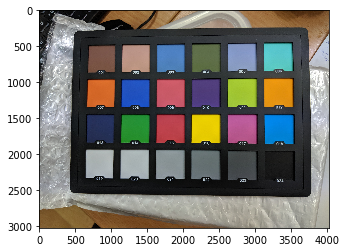

In [12]:
if __name__ == "__main__":
    
    colorChecker = cv2.imread('C:/Users/Ai/Documents/Urine Sample Analysis/Assets/cc-china.jpg')
    cc = cv2.cvtColor(colorChecker,cv2.COLOR_BGR2RGB)
    plt.imshow(cc)
    
    '''
    path = os.path.join(TESTS_RESOURCES_DIRECTORY, 'colour_checker_detection', 'detection','C:/Users/Ai/Documents/Urine Sample Analysis/Assets/cc-china.jpg')
    image = read_image(path)
    colour_checkers_coordinates_segmentation(image)
    '''

**Printout the rgb, linear rgb values**

In [5]:
    #print(cc[0:5,0:5,:])
    #Convert srgb to linear rgb
    cc = cc/255.0
    cc1 = srgb_to_linsrgb(cc)
    cc2 = linsrgb_to_srgb(cc1)
    print("Conversion from sRGB to linear RGB:\n")
    print(cc1[1,1,:])
    #plt.imshow(cc2)
    
    '''
    #Test the 18% gray value conversion from sRGB to linear sRGB
    #T
    gray_test = targetCC
    gray_test[0,0,:] = 118
    gray_test = gray_test /255.0
    gray_test = srgb_to_linsrgb(test118)
    print(gray_test[0,0,:])
    '''

Conversion from sRGB to linear RGB:

[  2.02351322e-05   1.66642265e-05   1.07127171e-05]


'\n#Test the 18% gray value conversion from sRGB to linear sRGB\n#T\ngray_test = targetCC\ngray_test[0,0,:] = 118\ngray_test = gray_test /255.0\ngray_test = srgb_to_linsrgb(test118)\nprint(gray_test[0,0,:])\n'

**Select ROIs from the Image**
- Select the color squares to extract the target RGB values
- Compute the mean for the B,G,R channels of each individual target ROI regions
- Swap the B,G,R to R,G,B
- Transform the sRGB values into linear RGB space

In [13]:
    targetCC = cv2.imread('C:/Users/Ai/Documents/Urine Sample Analysis/Assets/cc-china.jpg')
    print(targetCC[1,1,0:3])
   
    dim = (800,700)
    targetCC = cv2.resize(targetCC,dim,interpolation = cv2.INTER_AREA)
    #print('Size of Target CC image: ', targetCCsz)
    fromCenter = False
    cv2.namedWindow('Select ROIs',1)
    cv2.imshow('Select ROIs',targetCC)
    
    targetValue = select_compute_meanRGB(targetCC)
    
    '''
    ROIs = cv2.selectROIs('Select ROIs',targetCC,fromCenter)
    print("Target CC shape: ",targetCC.shape)
    targetValue = np.empty((0,3), int)
        
    for (idx,val) in enumerate(ROIs):
        ROI = targetCC[val[1]:val[1]+val[3], val[0]:val[0]+val[2],:]        
        channelMean = np.mean(ROI.reshape(-1,3),axis=0)
        targetValue = np.vstack((targetValue,channelMean))
        print(idx,channelMean)
    
    #targetValue = np.around(targetValue)
    #targetValue = targetValue.astype(int)
    #targetValue = np.vstack((targetValue,[118,118,118]))
    
    print(targetValue.shape)
    targetValue[:,[0,2]] = targetValue[:,[2,0]]
    #targetValue = targetValue.astype(int)
    print('--------BGR 2 RGB--------------------')
    print(targetValue)
    print('--------BGR 2 RGB--------------------')
    '''
    cv2.waitKey(0)    
    cv2.destroyAllWindows()

[ 9 14 17]
<class 'numpy.ndarray'>


**Computing the CCM using multiple regression**
- Normalize the reference values to convert from sRGB to linear sRGB space
- Compute the color correction matrix (CCM) using least squares method
- Multiply the CCM with the target values to get RGB values closer to the true colors
- Apply the CCM to the image to see the transformation

In [11]:
    linRefVal = srgb_to_linsrgb(refRGB)
    linTargetVal = srgb_to_linsrgb(targetValue)
    print(linRefVal.shape)
    print(linTargetVal.shape)
    
    ColorCorrectionMatrix = np.linalg.lstsq(linTargetVal,linRefVal,rcond=None)[0]
    
    print('------ Color Correction Matrix--------\n')
    print(ColorCorrectionMatrix)
    print('--------------------------------------\n')

(24, 3)
(24, 3)
------ Color Correction Matrix--------

[[ 1.14928787 -0.05281883  0.02403012]
 [ 0.18470073  1.42768188  0.24236718]
 [ 0.10366786 -0.01185061  0.93223179]]
--------------------------------------



In [12]:
    corrTargetVal = np.matmul(linTargetVal,ColorCorrectionMatrix)
    
    print("----------Corrected Target Value (Linear)----------------\n")
    print(corrTargetVal)
    print("---------------------------------------------------------\n")
    
    
    corrTargetVal = linsrgb_to_srgb(corrTargetVal)
    print("----------Corrected Target Value (sRGB)----------------\n")
    print(corrTargetVal)
    print("---------------------------------------------------------\n")

----------Corrected Target Value (Linear)----------------

[[ 0.28355833  0.14596522  0.10765215]
 [ 0.69707232  0.44198139  0.34155825]
 [ 0.2131553   0.34485594  0.58036963]
 [ 0.19626898  0.25163823  0.12219417]
 [ 0.44047966  0.4838937   0.63928814]
 [ 0.31496129  0.84253475  0.72129413]
 [ 0.82261758  0.19800506  0.08421995]
 [ 0.10103314  0.14026878  0.54528239]
 [ 0.74582362  0.1424321   0.19558429]
 [ 0.14639985  0.07717194  0.22991579]
 [ 0.57429396  0.83359346  0.19569341]
 [ 0.97984654  0.41769152  0.10400206]
 [ 0.0493887   0.05442318  0.12073618]
 [ 0.09202653  0.44280561  0.11500588]
 [ 0.63377194  0.06975388  0.1135839 ]
 [ 1.07250915  0.86891814  0.17500254]
 [ 0.64766992  0.14273322  0.33978425]
 [ 0.12466146  0.3559138   0.75720777]
 [ 0.64763782  0.65965965  0.58293374]
 [ 0.63591056  0.66234799  0.58772703]
 [ 0.41597065  0.44385796  0.39674826]
 [ 0.23335289  0.26104663  0.23242218]
 [ 0.10534997  0.11088956  0.09927806]
 [ 0.02149506  0.02047415  0.0176636 ]]
----

In [1]:
    #print(targetCC)
    targetImage = srgb_to_linsrgb(targetCC)
    targetImage = np.matmul(targetImage,ColorCorrectionMatrix)
    #print(targetImage)
    
    targetImage = np.abs(targetImage)
   
    targetImage = linsrgb_to_srgb(targetImage)
    
    #targetImage = targetImage.astype(np.uint8)
    #print(targetImage)
    #plt.imshow(targetImage)
    #targetImage = np.array(targetImage,dtype = np.int)
    #cv2.imshow("correct image",targetImage)
    
    targetCorrValue = select_compute_meanRGB(targetImage)
    
    print("Ref RGB Yellow: 250,226,21")
    targetCorrValue = targetCorrValue.astype(np.uint8)
    print("Target Image Yellow: ", targetCorrValue)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

NameError: name 'srgb_to_linsrgb' is not defined

In [33]:
    paletteFrame = 255 * np.ones(shape=[512, 512, 3], dtype=np.uint8)
    color_list = new_srgb.tolist()
    drawPoint = (0,0)
    colors = [tuple(x) for x in color_list]
    print(new_srgb.shape[0])
    space = 0
    cv2.rectangle(paletteFrame, (10,10), (50,50), colors[3], thickness=-1)
    cv2.rectangle(paletteFrame, (180,10), (50,50), colors[2], thickness=-1)
    
    '''
    for i in range(2):
        cv2.rectangle(paletteFrame, (i*space+10,i*space+10), (50,50), colors[3], thickness=-1)
        print(space,space," ",colors[i])
        space += 70
    '''
    cv2.imshow("Pallete",paletteFrame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

NameError: name 'new_srgb' is not defined